# UBER SUPPLY DEMAND ANALYSIS ASSIGNMENT

## Dataframe Creation process
-  Creating a dataframe in pandas using the csv file from Uber

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


uber_src = pd.read_csv("C:\\Users\\SRath\\Desktop\\Uber Assignment\\Uber Request Data.csv")
uber_src.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


## Section 1

### Data Preparation
-  Changing date and time fields in datetime format
-  Renaming the column names to replace inbetween spaces to underscore for eazy identification.

In [151]:
uber_src['Request timestamp'] = pd.to_datetime(uber_src['Request timestamp'], dayfirst = True)
uber_src['Drop timestamp'] = pd.to_datetime(uber_src['Drop timestamp'], dayfirst = True)

uber_src.columns = uber_src.columns.str.strip().str.lower().str.replace(' ','_')

-  To check how many records are there with null drop time

In [153]:
#uber_src['Driver_id'] = uber_src['Driver_id'].apply(np.int64)
uber_src_null = uber_src[uber_src['drop_timestamp'].isnull()]
uber_src_null.shape

(3914, 6)

-  Derived metrics from datetime columns

In [154]:
uber_src['request_year'] = uber_src['request_timestamp'].dt.year
uber_src['request_month'] = uber_src['request_timestamp'].dt.month
uber_src['request_day'] = uber_src['request_timestamp'].dt.day
uber_src['request_hour'] = uber_src['request_timestamp'].dt.hour
uber_src['request_mins'] = uber_src['request_timestamp'].dt.minute

uber_src.head()

,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp,request_year,request_month,request_day,request_hour,request_mins
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016,7,11,11,51
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016,7,11,17,57
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016,7,12,9,17
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016,7,12,21,8
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016,7,13,8,33


## Based on timeslots - Problematic requests

### Frequency Distribution of All requests on status

-  A countplot showing: 
> count of requests on Y axis <br>
> Pickup points on x axis <br>
> frequency of requests that get cancelled or no cars available or trip completed

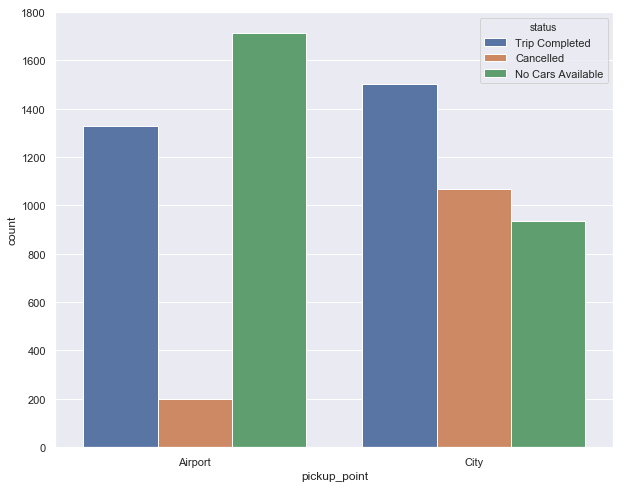

In [155]:
sns.set()
plt.figure(figsize = (10,8))
sns.countplot(x = 'pickup_point',hue = 'status',data = uber_src)
plt.show()

### Deriving Timeslots based on Request Hours
-  Day has been divided into 5 timeslots
>  0000-0600 hrs: Late night <br>
>  0600-1200 hrs: Morning <br>
>  1200-1700 hrs: Afternoon <br>
>  1700-2000 hrs: Evening <br>
>  2000-2400 hrs: Night

In [156]:
uber_src['time_slots'] = pd.cut(uber_src['request_hour'], [0,6,12,17,20,24], labels = ["Late night","Morning","Afternoon","Evening","Night"], right = False)

uber_src.head()

,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp,request_year,request_month,request_day,request_hour,request_mins,time_slots
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016,7,11,11,51,Morning
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016,7,11,17,57,Evening
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016,7,12,9,17,Morning
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016,7,12,21,8,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016,7,13,8,33,Morning


### Timeslot and Request distribution plot
-  Plot showing the distribution of requests over different timeslots

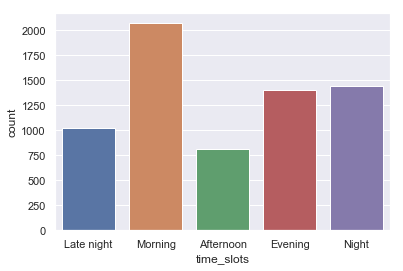

In [157]:
sns.set(color_codes = True)
sns.countplot(x = 'time_slots', data = uber_src)

### Timeslot, Status and Requests plot
-  Plot showing status wise distribution of requests over timeslots

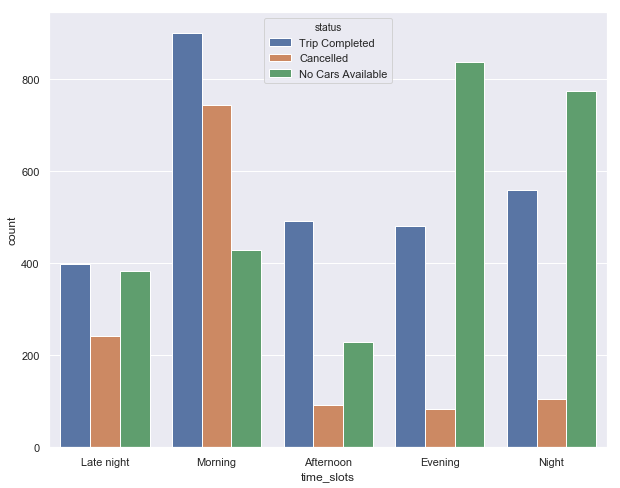

In [158]:
sns.set()
plt.figure(figsize = (10,8))
sns.countplot(x = 'time_slots', hue = 'status', data = uber_src)

### Timeslots vs PickupPoint Plot
-  Plot showing the no of requests made from city or airport at different timeslots

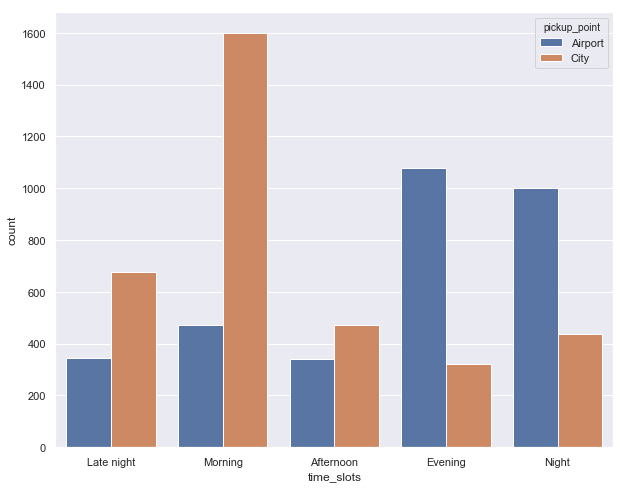

In [159]:
sns.set()
plt.figure(figsize = (10,8))
sns.countplot(x = 'time_slots', hue = 'pickup_point', data = uber_src)

## Section - 2
### Demand, Supply and Gap Analysis
-  Deriving demand, supply and gap columns based on status
> demand = sum of all three status <br>
> supply = trip completed status <br>
> gap = demand - supply

In [160]:
uber_src['demand'] = 1

uber_src['supply'] = uber_src['status'].apply(lambda x : 1 if x == "Trip Completed" else 0)

uber_src['gap'] = uber_src['demand'] - uber_src['supply']


uber_src.head()

,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp,request_year,request_month,request_day,request_hour,request_mins,time_slots,demand,supply,gap
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016,7,11,11,51,Morning,1,1,0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016,7,11,17,57,Evening,1,1,0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016,7,12,9,17,Morning,1,1,0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016,7,12,21,8,Night,1,1,0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016,7,13,8,33,Morning,1,1,0


### GAP Analysis on the basis of derived Timeslots
-  I want to analyse the Gap only based on timeslots
> It shows the Morning timeslot has the deadliest gap when I grouped by based on timeslots only. <br>
-  Reset the index column so as to use both timeslots and gap columns in the barchart
-  The barchart shows the distribution as below

In [162]:
timeslot_df = uber_src.pivot_table(index = 'time_slots', values = 'gap', aggfunc = 'sum')
timeslot_df

,gap
time_slots,
Late night,624
Morning,1172
Afternoon,319
Evening,920
Night,879


In [163]:
timeslot_df.reset_index(inplace = True)
timeslot_df

,time_slots,gap
0,Late night,624
1,Morning,1172
2,Afternoon,319
3,Evening,920
4,Night,879


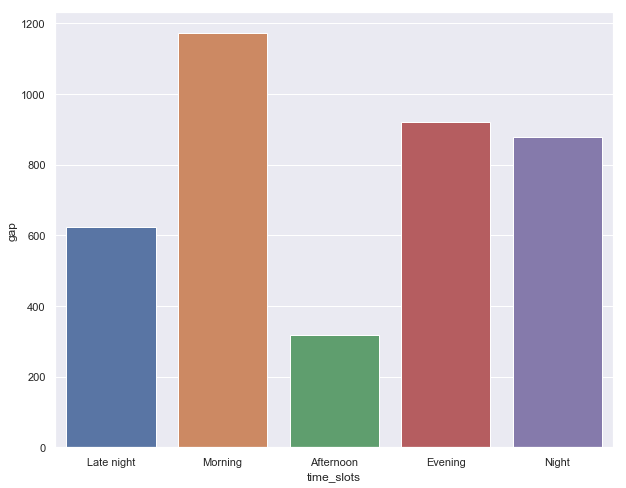

In [164]:
sns.set()
plt.figure(figsize = (10,8))
sns.barplot(x = 'time_slots',y = 'gap',data = timeslot_df)
plt.show()

### GAP Analysis on the basis of derived Timeslots and Type of requests(Pick up City/Airport)
-  I want to analyse the Gap based on timeslots and type of requests(city to airport / airport to city).
-  Did a grouping of timeslots and pickup_points and calculated the sum of derived gap column.
> It shows the deadliest gap is during the Morning timeslots for City to airport services. <br>
-  Reset the index column so as to use timeslots,pickup_points and gap columns in the barchart
-  The barchart shows the distribution as below

In [167]:
timeSlot_Pickup = uber_src.pivot_table(index = ['time_slots','pickup_point'], values = 'gap', aggfunc = 'sum')
timeSlot_Pickup

gap
time_slots pickup_point      
Late night Airport        157
           City           467
Morning    Airport         74
           City          1098
Afternoon  Airport        114
           City           205
Evening    Airport        841
           City            79
Night      Airport        725
           City           154

In [168]:
timeSlot_Pickup.reset_index(inplace = True)
timeSlot_Pickup

,time_slots,pickup_point,gap
0,Late night,Airport,157
1,Late night,City,467
2,Morning,Airport,74
3,Morning,City,1098
4,Afternoon,Airport,114
5,Afternoon,City,205
6,Evening,Airport,841
7,Evening,City,79
8,Night,Airport,725
9,Night,City,154


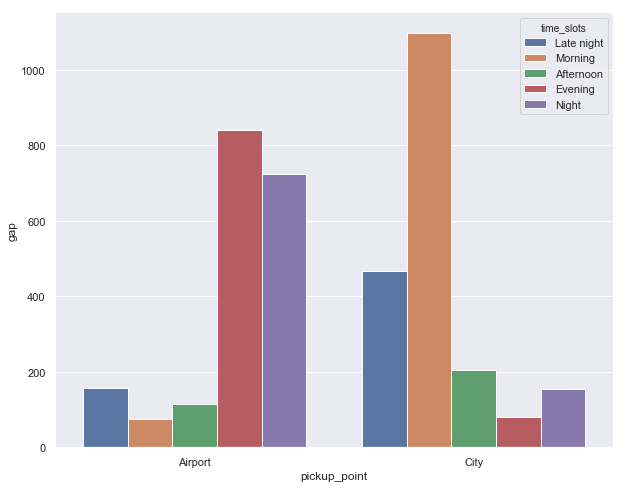

In [169]:
sns.set()
plt.figure(figsize = (10,8))
sns.barplot(x = 'pickup_point', y = 'gap', hue = 'time_slots', data = timeSlot_Pickup)
plt.show()

In [210]:
uber_src_new = uber_src[uber_src.status != 'Trip Completed']
uber_src_new.head()

,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp,request_year,request_month,request_day,request_hour,request_mins,time_slots,demand,supply,gap
2831,2905,City,1.0,Cancelled,2016-07-13 06:08:41,NaT,2016,7,13,6,8,Morning,1,0,1
2832,4805,City,1.0,Cancelled,2016-07-14 17:07:58,NaT,2016,7,14,17,7,Evening,1,0,1
2833,5202,Airport,1.0,Cancelled,2016-07-14 20:51:37,NaT,2016,7,14,20,51,Night,1,0,1
2834,5927,City,1.0,Cancelled,2016-07-15 10:12:40,NaT,2016,7,15,10,12,Morning,1,0,1
2835,2347,Airport,2.0,Cancelled,2016-07-12 19:14:00,NaT,2016,7,12,19,14,Evening,1,0,1


In [211]:
timeSlot_Status = uber_src_new.pivot_table(index = ['time_slots','status'], values = 'gap', aggfunc = 'sum')
timeSlot_Status

gap
time_slots status                
Late night Cancelled          241
           No Cars Available  383
Morning    Cancelled          744
           No Cars Available  428
Afternoon  Cancelled           91
           No Cars Available  228
Evening    Cancelled           83
           No Cars Available  837
Night      Cancelled          105
           No Cars Available  774

In [212]:
timeSlot_Status.reset_index(inplace = True)
timeSlot_Status

,time_slots,status,gap
0,Late night,Cancelled,241
1,Late night,No Cars Available,383
2,Morning,Cancelled,744
3,Morning,No Cars Available,428
4,Afternoon,Cancelled,91
5,Afternoon,No Cars Available,228
6,Evening,Cancelled,83
7,Evening,No Cars Available,837
8,Night,Cancelled,105
9,Night,No Cars Available,774


### Timeslot vs Status(Cancelled and No Cars available) Requests

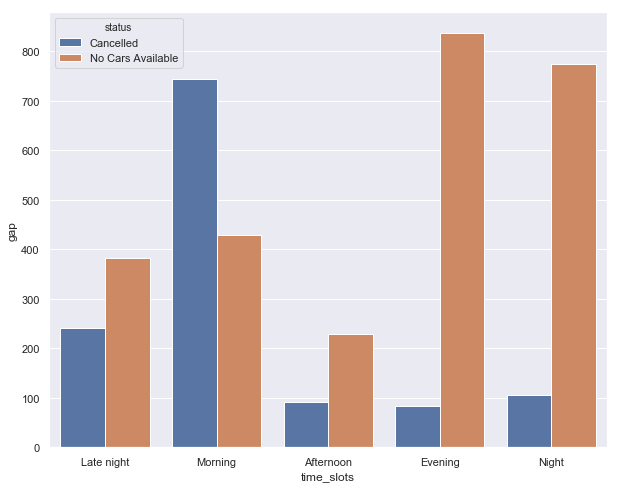

In [213]:
sns.set()
plt.figure(figsize = (10,8))
sns.barplot(x = 'time_slots', y = 'gap', hue = 'status', data = timeSlot_Status)
plt.show()

## Section 3

### Deriving Trip Duration from the Request and Drop time of completed each trip

-  Drop time is available for only completed trips. Creating a new dataframe with only completed trips.

In [214]:
completed_uber = uber_src[uber_src['status'] == 'Trip Completed']

completed_uber['trip_duration_secs'] = (completed_uber['drop_timestamp'] - completed_uber['request_timestamp']).astype('timedelta64[s]')

completed_uber.head()

C:\Users\SRath\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp,request_year,request_month,request_day,request_hour,request_mins,time_slots,demand,supply,gap,trip_duration_secs
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016,7,11,11,51,Morning,1,1,0,4140.0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016,7,11,17,57,Evening,1,1,0,3000.0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016,7,12,9,17,Morning,1,1,0,2460.0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016,7,12,21,8,Night,1,1,0,3300.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016,7,13,8,33,Morning,1,1,0,3151.0


### Mean trip duration calculation
-  The trip duration is calculated in seconds and then converted into int for aggregate operations
> The average trip duration across all timeslots is very similar and has very less difference

In [215]:
completed_uber['trip_duration_secs'] = completed_uber['trip_duration_secs'].values.astype(np.int64)

trip_time_ts = completed_uber.pivot_table(index = 'time_slots', values = 'trip_duration_secs', aggfunc = 'mean')
trip_time_ts

C:\Users\SRath\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,trip_duration_secs
time_slots,
Late night,3166.919799
Morning,3168.334444
Afternoon,3130.177189
Evening,3081.045738
Night,3158.925000


In [179]:
trip_time_ts.reset_index(inplace = True)
trip_time_ts

,time_slots,trip_duration_secs
0,Late night,3166.919799
1,Morning,3168.334444
2,Afternoon,3130.177189
3,Evening,3081.045738
4,Night,3158.925000


### Average Time_Duration vs Timeslots Plot

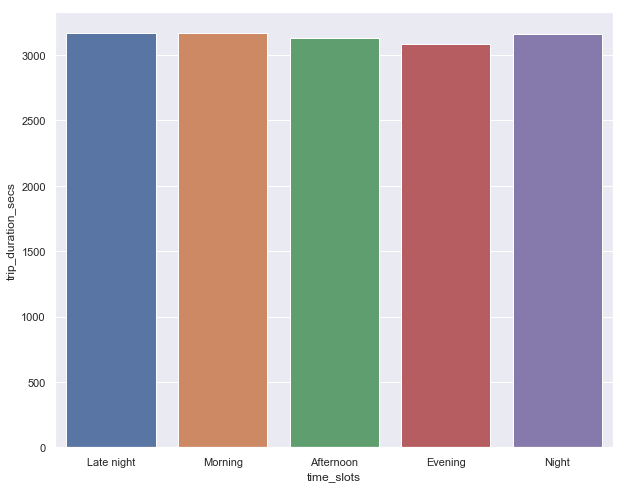

In [181]:
sns.set()
plt.figure(figsize = (10,8))
sns.barplot(x = 'time_slots',y = 'trip_duration_secs', data = trip_time_ts)
plt.show()


### Average Trip_Duration vs Timeslots vs Request_type Plot
-  Comparing the trip duration across different timeslots for the completed requests from both city and airport

> The average values seems to be very close across the timeslots for city and airport pickups. <br>

In [184]:
trip_time_req_ts = completed_uber.pivot_table(index = ['time_slots','pickup_point'], values = 'trip_duration_secs', aggfunc = 'mean')
trip_time_req_ts

trip_duration_secs
time_slots pickup_point                    
Late night Airport              3115.031915
           City                 3213.151659
Morning    Airport              3136.726817
           City                 3193.506986
Afternoon  Airport              3118.573333
           City                 3139.992481
Evening    Airport              3121.722689
           City                 3041.205761
Night      Airport              3167.509025
           City                 3150.522968

C:\Users\SRath\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


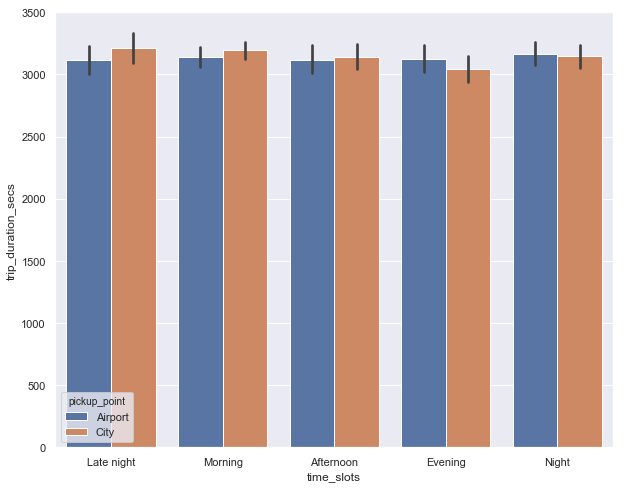

In [183]:
sns.set()
plt.figure(figsize = (10,8))
sns.barplot(x = 'time_slots',y = 'trip_duration_secs', hue = 'pickup_point', estimator = np.mean, data = completed_uber)
plt.show()

### Computing the Idle time of each driver
-  For the Idle time computation, we are considering the current drop time of each request and next request time for the particular driver.
-  Idle time = Current Drop time - next Request time

In [209]:
completed_uber['next_request_timestamp'] = (completed_uber.sort_values(by = 'request_timestamp', ascending = True).groupby('driver_id')['request_timestamp'].shift(-1))

completed_uber.head()

C:\Users\SRath\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp,request_year,request_month,request_day,request_hour,request_mins,time_slots,demand,supply,gap,trip_duration_secs,next_request_timestamp,idle_time,destination
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016,7,11,11,51,Morning,1,1,0,4140,2016-07-11 17:57:00,17820,City
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016,7,11,17,57,Evening,1,1,0,3000,2016-07-12 09:17:00,52200,City
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016,7,12,9,17,Morning,1,1,0,2460,2016-07-12 21:08:00,40200,Airport
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016,7,12,21,8,Night,1,1,0,3300,2016-07-13 08:33:16,37816,City
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016,7,13,8,33,Morning,1,1,0,3151,2016-07-13 21:57:28,45101,Airport


-  Converting Idle_time to integer format for mathematical operations
-  Deriving Destination column from pickup_point. It helps to know where the ideal time is spent.
-  Ideal time is 0 when the driver don't get any next trip request.

In [205]:
completed_uber['idle_time'] = (completed_uber['next_request_timestamp'] - completed_uber['drop_timestamp']).astype('timedelta64[s]')

completed_uber['idle_time'] = completed_uber['idle_time'].values.astype(np.int64)

completed_uber['destination'] = completed_uber['pickup_point'].apply(lambda x:'Airport' if (x == 'City') else 'City')

completed_uber['idle_time'] = completed_uber['idle_time'].apply(lambda x : 0 if (x < 0) else x)

completed_uber.head(100)

C:\Users\SRath\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\SRath\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\SRath\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be s

,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp,request_year,request_month,request_day,request_hour,request_mins,time_slots,demand,supply,gap,trip_duration_secs,next_request_timestamp,idle_time,destination
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016,7,11,11,51,Morning,1,1,0,4140,2016-07-11 17:57:00,17820,City
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016,7,11,17,57,Evening,1,1,0,3000,2016-07-12 09:17:00,52200,City
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016,7,12,9,17,Morning,1,1,0,2460,2016-07-12 21:08:00,40200,Airport
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016,7,12,21,8,Night,1,1,0,3300,2016-07-13 08:33:16,37816,City
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016,7,13,8,33,Morning,1,1,0,3151,2016-07-13 21:57:28,45101,Airport
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,2016,7,13,21,57,Night,1,1,0,1891,2016-07-14 06:15:32,27993,City
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,2016,7,14,6,15,Morning,1,1,0,3463,2016-07-15 05:11:52,79117,City
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,2016,7,15,5,11,Late night,1,1,0,3360,2016-07-15 17:57:27,42575,City
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,2016,7,15,17,57,Evening,1,1,0,3204,NaT,0,Airport
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,2016,7,11,6,46,Morning,1,1,0,2340,2016-07-12 05:08:00,78180,Airport


### Ideal_time vs Destination vs time_slots Plot
-  The plot shows the average ideal_time of drivers at City and Airport respectively at the end of their trips.
> The ideal time at Airport is high during the Afternoon.<br>
> The ideal time at City is high during Late Nights.

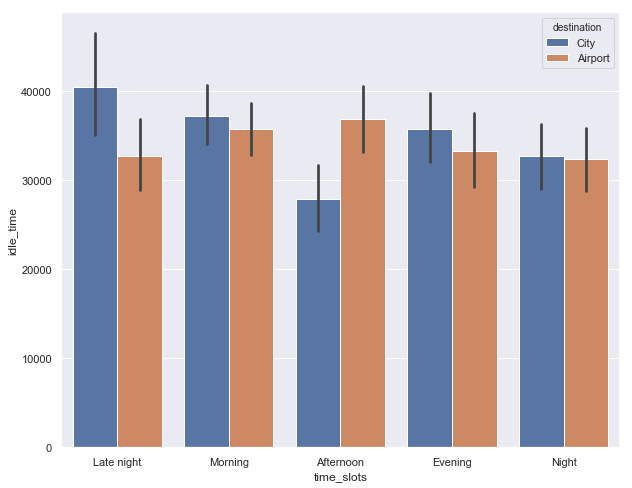

In [207]:
sns.set()
plt.figure(figsize = (10,8))
sns.barplot(x = 'time_slots',y = 'idle_time', hue = 'destination', estimator = np.mean, data = completed_uber)
plt.show()